# 데이터 불러오기 

In [1]:
import os 
from dotenv import load_dotenv

# api key 관리를 위해 사용 
load_dotenv("./env-credit")

huggingface_token = os.environ.get("HUGGINGFACE_TOKEN")

In [2]:
import kagglehub

# kagglehub로 데이터 다운받기 
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

print("데이터 세트 파일 경로:", path)

데이터 세트 파일 경로: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


In [3]:
# kaggle에서 데이터를 다운 받으면 아래와 같은 경로로 다운 받아짐 
data_path = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/myntradataset"

# 디렉터리 내 파일/폴더 이름 출력
print(os.listdir(data_path))

['images', 'styles.csv']


In [4]:
import csv 
import pandas as pd

# styles.csv 파일 경로 설정함
csv_path = os.path.join(data_path, "styles.csv")

# 처리된 데이터를 저장할 리스트 초기화함
processed_rows = []

with open(csv_path, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) > 10:
            # 마지막 필드에 콤마가 포함되어 추가 컬럼으로 잘못 파싱된 경우 처리함
            fixed_part = row[:9]  # 처음 9개 컬럼(id ~ usage)은 고정 필드로 유지함
            
            # 10번째 이후의 모든 값을 콤마로 연결하여 하나의 필드로 합침
            # 이는 마지막 컬럼에 콤마가 포함된 텍스트가 있어 발생한 문제를 해결하기 위함임
            last_part = ",".join(row[9:])
            
            # 수정된 행 생성 및 저장함
            processed_row = fixed_part + [last_part]
            processed_rows.append(processed_row)
        else:
            # 정상적으로 10개 컬럼으로 파싱된 행은 그대로 사용함
            processed_rows.append(row)

# 처리된 첫 3개 행을 출력하여 정상 처리 여부 확인함
for row in processed_rows[:3]:
    print(row)

# 처리된 데이터를 pandas DataFrame으로 변환함
# 첫 번째 행은 컬럼명으로, 나머지 행은 데이터로 사용함
style_df = pd.DataFrame(processed_rows[1:], columns=processed_rows[0])

['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']
['15970', 'Men', 'Apparel', 'Topwear', 'Shirts', 'Navy Blue', 'Fall', '2011', 'Casual', 'Turtle Check Men Navy Blue Shirt']
['39386', 'Men', 'Apparel', 'Bottomwear', 'Jeans', 'Blue', 'Summer', '2012', 'Casual', 'Peter England Men Party Blue Jeans']


In [5]:
# 총 데이터 확인 
style_df.shape

(44446, 10)

In [6]:
# 정상적으로 모두 변환 되었는지 tail 부분 확인 
style_df.tail(2)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017,Casual,Rasasi Women Blue Lady Perfume
44445,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016,Casual,Fossil Women Pink Dial Chronograph Watch ES3050


# 데이터 EDA

In [7]:
# 각 컬럼별 유니크한 값의 수를 확인 
print("subCategory 고유값 수 :", len(style_df.subCategory.unique()))
print("masterCategory 고유값 수 :", len(style_df.masterCategory.unique()))
print("articleType 고유값 수 :", len(style_df.articleType.unique()))
print("baseColour 고유값 수 :", len(style_df.baseColour.unique()))

subCategory 고유값 수 : 45
masterCategory 고유값 수 : 7
articleType 고유값 수 : 143
baseColour 고유값 수 : 47


In [8]:
# 결측치 개수 확인
print(style_df.isnull().sum())

# 혹은 결측치 비율로 확인
print(style_df.isnull().mean() * 100, '%')


id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64
id                    0.0
gender                0.0
masterCategory        0.0
subCategory           0.0
articleType           0.0
baseColour            0.0
season                0.0
year                  0.0
usage                 0.0
productDisplayName    0.0
dtype: float64 %


In [9]:
categorical_cols = ['gender', 'masterCategory', 'subCategory', 
                    'articleType', 'baseColour', 'season', 'usage']

for col in categorical_cols:
    print(f"=== {col} ===")
    print(style_df[col].value_counts())
    print() 


=== gender ===
gender
Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: count, dtype: int64

=== masterCategory ===
masterCategory
Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

=== subCategory ===
subCategory
Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                       

일부 결측치가 NA로 채워져있음을 확인함 

In [10]:
import warnings
warnings.filterwarnings('ignore')

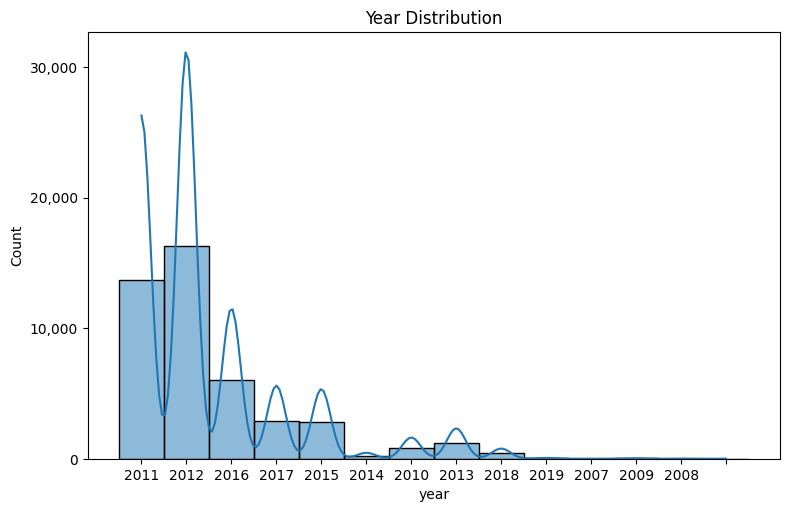

In [11]:
# 연도별로 데이터 분포 확인 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=style_df, x='year', bins=3, kde=True)

# y축 눈금 개수 조정
plt.locator_params(axis='y', nbins=5)  # y축 눈금 개수를 5개로 제한

# 또는 y축 레이블 포맷 지정
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.title('Year Distribution')
plt.show()

In [12]:
# 시즌(season) & 연도(year)에 따른 제품 분포
pd.crosstab(style_df['season'], style_df['year'])

year,,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
season,,,,,,,,,,,,,,
,1,0,0,0,0,20,0,0,0,0,0,0,0,0
Fall,0,0,1,19,640,8749,1886,71,34,28,11,0,6,0
Spring,0,2,3,0,3,80,131,373,18,2,0,2372,1,0
Summer,0,0,2,1,133,4683,13129,718,138,304,1737,540,58,33
Winter,0,0,1,0,70,157,1144,51,46,2446,4259,5,340,0


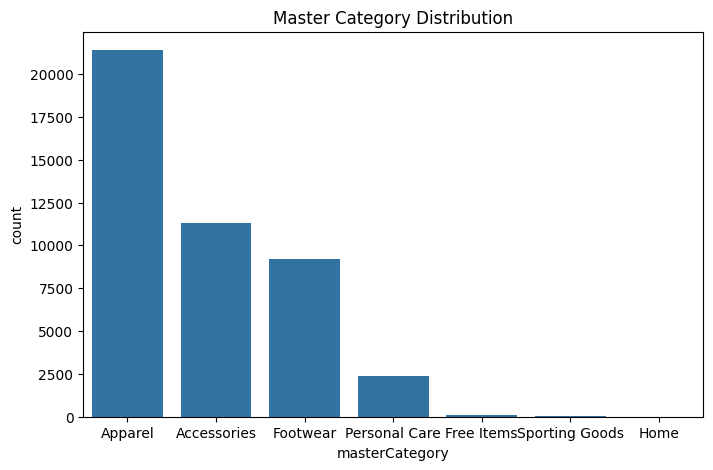

In [13]:
# 메인 카테고리를 기준으로 데이터 확인 
plt.figure(figsize=(8,5))
sns.countplot(data=style_df, x='masterCategory')
plt.title('Master Category Distribution')
plt.show()


In [14]:
# 어느 연도에 어떤 메인 카테고리가 많이 나왔는지 확인 
# 1) 일단 문자열을 숫자로 변환하되, 안 되는 경우 NaN으로 처리
style_df['year'] = pd.to_numeric(style_df['year'], errors='coerce')

# 2) NaN이 된 행을 어떻게 처리할지 결정
# 여기서는 단순히 NaN이 있으면 제거(drop)하거나 특정 값으로 채우기
style_df = style_df.dropna(subset=['year'])

style_df['year'] = style_df['year'].astype(int)
category_year = style_df.groupby('masterCategory')['year'].agg(['count', 'mean', 'min', 'max'])
print(category_year)


                count         mean   min   max
masterCategory                                
Accessories     11289  2013.952520  2008  2018
Apparel         21399  2011.966447  2008  2018
Footwear         9222  2012.234223  2007  2018
Free Items        105  2014.676190  2010  2017
Home                1  2012.000000  2012  2012
Personal Care    2404  2017.027038  2016  2019
Sporting Goods     25  2010.800000  2010  2012


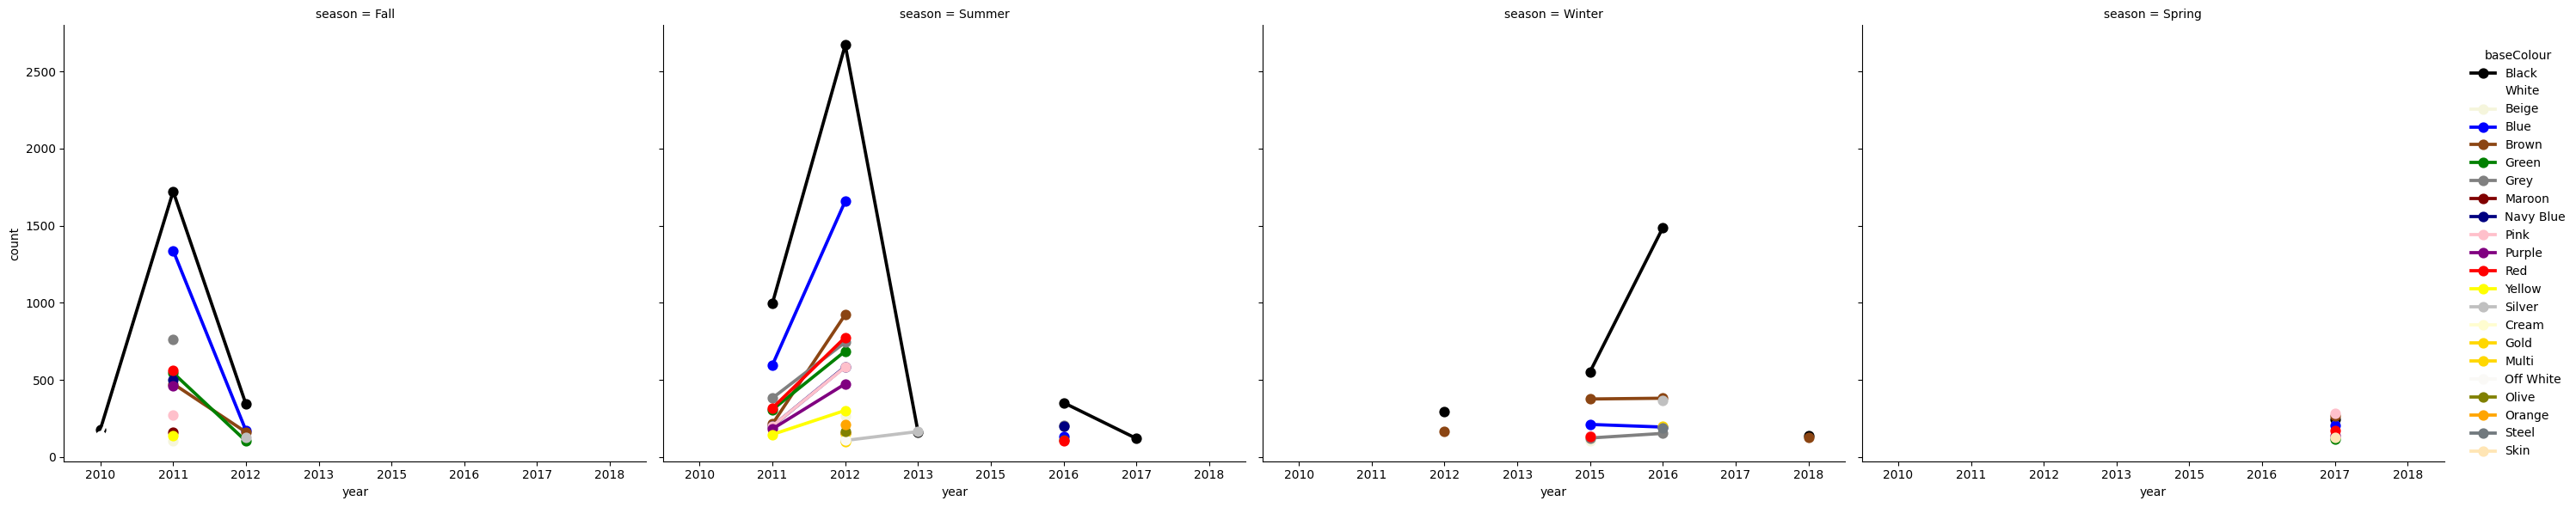

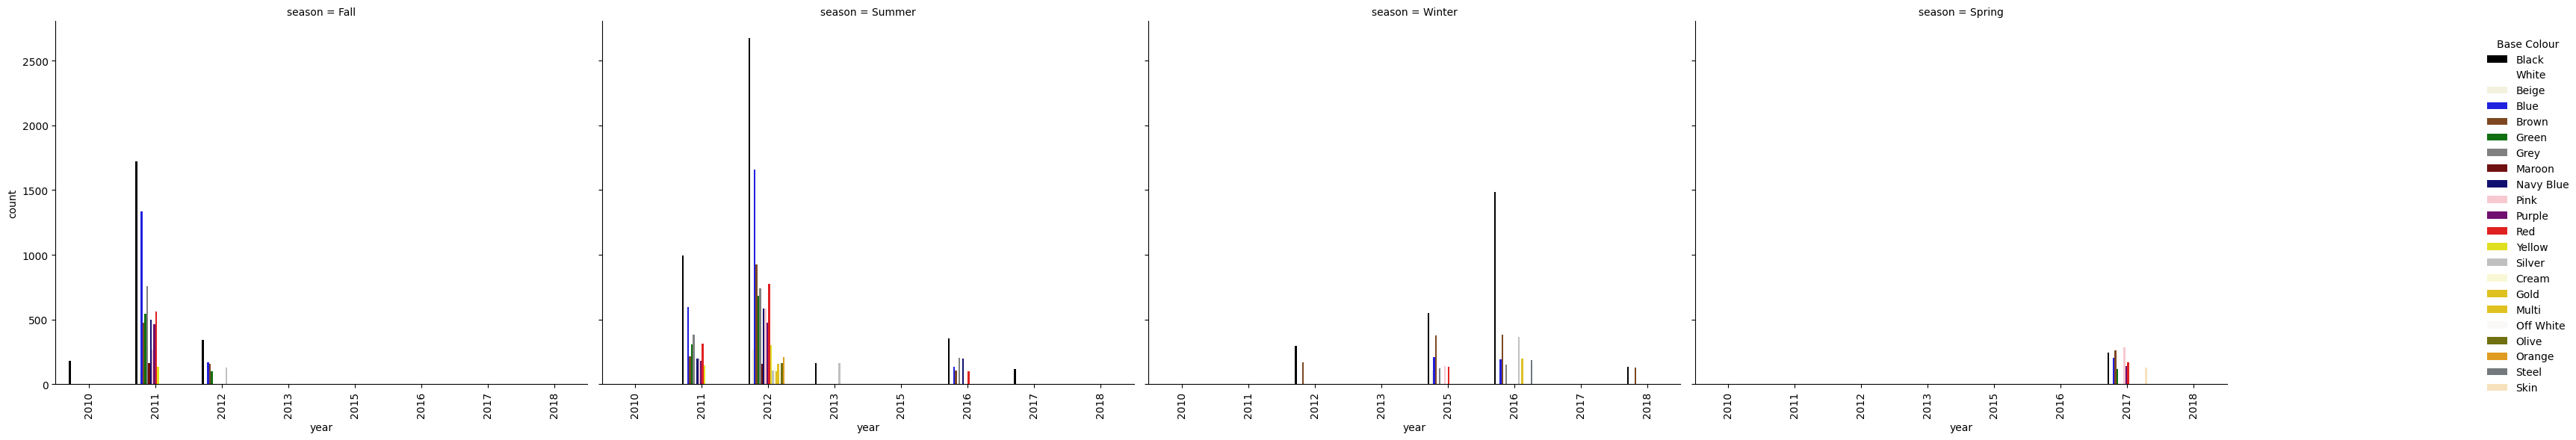

In [15]:
# 데이터 그룹화 후 count가 100 이상인 것만 필터링
year_season_color = style_df.groupby(['year', 'season', 'baseColour']).size().reset_index(name='count')
filtered_data = year_season_color[year_season_color['count'] >= 100]

color_mapping = {
    'Black': '#000000',
    'Blue': '#0000FF',
    'Brown': '#8B4513',
    'Green': '#008000',
    'Grey': '#808080',
    'Navy Blue': '#000080',
    'Pink': '#FFC0CB',
    'Purple': '#800080',
    'Red': '#FF0000',
    'White': '#FFFFFF',
    'Yellow': '#FFFF00',
    'Beige': '#F5F5DC',
    'Orange': '#FFA500',
    'Maroon': '#800000',
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Cream': '#FFFDD0',
    'Olive': '#808000',
    'Charcoal': '#36454F',
    'Khaki': '#C3B091',
    'Lavender': '#E6E6FA',
    'Skin': '#FFE5B4',    
    'Steel': '#71797E',   
    'Off White': '#FAF9F6',
    'Multi': '#FFD700'     
}

# catplot 생성
# 방법 1: line plot 사용
g = sns.catplot(
    data=filtered_data, 
    x='year', 
    y='count', 
    hue='baseColour',
    col='season',    
    kind='point',   
    height=6,
    aspect=1.2,
    markers='o',    
    linestyles='-', 
    palette=color_mapping
)

# 또는 방법 2: 막대 그래프 유지하면서 배치 조정
g = sns.catplot(
    data=filtered_data, 
    x='year', 
    y='count', 
    hue='baseColour',
    col='season',    
    kind='bar',
    height=6,
    aspect=1.2,
    dodge=True,
    width=0.6,       
    palette=color_mapping
)

# 공통 설정
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 범례를 그래프 밖으로 이동하고 크기 조정
g.fig.subplots_adjust(right=0.85)  
g._legend.set_bbox_to_anchor((1.15, 0.5))
g._legend.set_title('Base Colour') 

plt.tight_layout()
plt.show()

In [16]:
# 컬러 종류 확인 
len(year_season_color["baseColour"].value_counts())

47

In [17]:
# 컬러별 개수확인 
year_season_color["baseColour"].value_counts()

baseColour
Black                37
White                36
Brown                30
Grey                 30
Red                  30
Navy Blue            29
Purple               27
Blue                 27
Green                25
Beige                25
Yellow               25
Pink                 23
Maroon               23
Orange               21
Silver               20
Charcoal             19
Olive                19
Cream                18
Gold                 17
Multi                17
Tan                  16
Lavender             14
Magenta              13
Off White            13
Grey Melange         12
Teal                 12
Khaki                12
Coffee Brown         11
Rust                 11
Peach                11
Burgundy             10
Bronze               10
Mustard              10
Skin                 10
Copper                9
Turquoise Blue        9
Steel                 8
Nude                  7
Mauve                 7
Metallic              6
Taupe                 6
Mushr

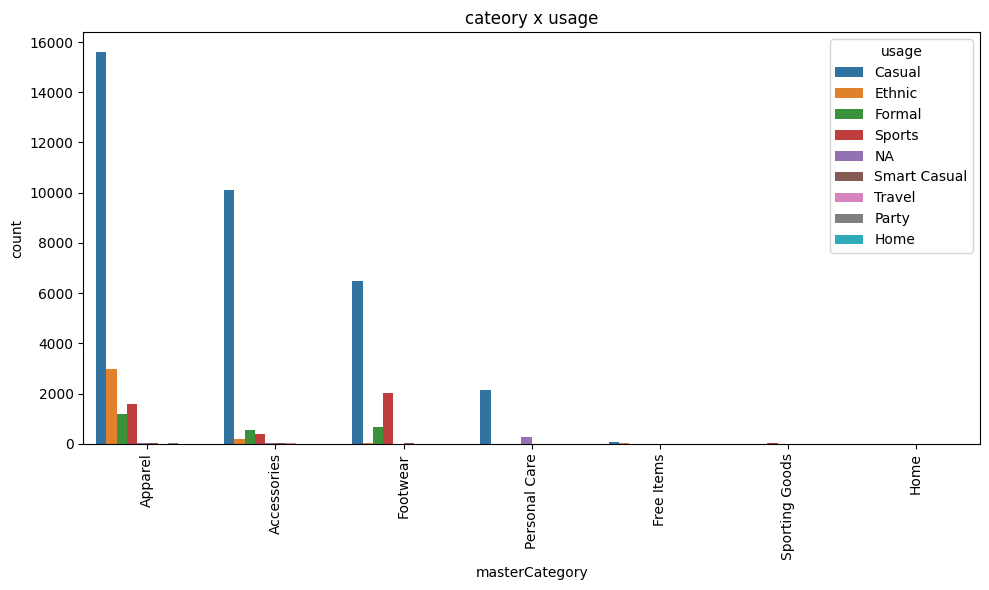

In [18]:
# 각 카테고리별 usage 분포 확인 
# (1) usage 분포 확인
usage_counts = style_df['usage'].value_counts()

# (2) masterCategory × usage 교차표
usage_category = style_df.groupby(['masterCategory', 'usage']).size().reset_index(name='count')

# (3) 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 키움
sns.countplot(data=style_df, x='masterCategory', hue='usage')
plt.title("cateory x usage")

# x축 레이블 회전
plt.xticks(rotation=90)

# 그래프 여백 조정
plt.tight_layout()

plt.show()

In [19]:
usage_category

,masterCategory,usage,count
0,Accessories,Casual,10097
1,Accessories,Ethnic,207
2,Accessories,Formal,527
3,Accessories,NA,28
4,Accessories,Party,2
5,Accessories,Smart Casual,28
6,Accessories,Sports,375
7,Accessories,Travel,25
8,Apparel,Casual,15605
9,Apparel,Ethnic,2960


# 학습용 데이터 만들기 

In [20]:
image_path = os.path.join(data_path, "images")
image_list = os.listdir(image_path)
image_list[:3]

['10000.jpg', '10001.jpg', '10002.jpg']

In [21]:
# 문자열(object) 타입의 컬럼만 선택하여 각각의 고유값 확인
for column in style_df.select_dtypes(include=['object']).columns:
    print(f"\n{column}의 고유값:")
    print(style_df[column].unique())


id의 고유값:
['15970' '39386' '59263' ... '18842' '46694' '51623']

gender의 고유값:
['Men' 'Women' 'Boys' 'Girls' 'Unisex']

masterCategory의 고유값:
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']

subCategory의 고유값:
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']

articleType의 고유값:
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'B

In [22]:
# 데이터 리스트 생성
image_data_list = []

# 각 파일에 대해 처리
for file_name in image_list:
    # 전체 파일 경로 생성
    full_path = os.path.join(image_path, file_name)
    
    # 파일명에서 확장자를 제외한 ID 추출
    file_id = file_name.split('.')[0]
    
    # 데이터 리스트에 추가
    image_data_list.append({
        'file_path': full_path,
        'id': file_id
    })

In [23]:
image_df = pd.DataFrame(image_data_list)
print(image_df.shape)
image_df.head(2)

(44441, 2)


,file_path,id
0,/root/.cache/kagglehub/datasets/paramaggarwal/...,10000
1,/root/.cache/kagglehub/datasets/paramaggarwal/...,10001


In [24]:
merged_df = pd.merge(image_df, style_df, on="id", how="inner")
merged_df.shape

(44440, 11)

In [25]:
merged_df.head(2)

,file_path,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,/root/.cache/kagglehub/datasets/paramaggarwal/...,10000,Women,Apparel,Bottomwear,Skirts,White,Summer,2011,Casual,Palm Tree Girls Sp Jace Sko White Skirts
1,/root/.cache/kagglehub/datasets/paramaggarwal/...,10001,Women,Apparel,Bottomwear,Skirts,Blue,Summer,2011,Casual,Palm Tree Kids Girls Sp Jema Skt Blue Skirts


In [26]:
import io
from datasets import Features, Value, ClassLabel, Image, Dataset
from PIL import Image as PILImage

hf_ds = Dataset.from_pandas(merged_df)
# PIL Image를 바이트로 변환하는 함수
def convert_to_bytes(example):
    file_path = example["file_path"]
    with PILImage.open(file_path) as img:
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format="PNG")
        # HF Image 타입에 맞는 {'bytes': ...} 형태로 저장
        example["file_path"] = {"bytes": img_byte_arr.getvalue()}
    return example

# Hugging Face Dataset에서는 map을 이렇게 사용
converted_ds = hf_ds.map(convert_to_bytes)



Map:   0%|          | 0/44440 [00:00<?, ? examples/s]

In [27]:
converted_ds[0]

{'file_path': {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00<\x00\x00\x00P\x08\x02\x00\x00\x00\xca\xa8\x81\x04\x00\x00\x07\xb8IDATx\x9c\xedZM\x8f\xe4H\x11}\x11i\x97\xbb\xa7\x87A\x88\x8f\x19!\x8d`W\xac\xf6\x848q\x80\x7f\xcf\x01\x89\xbdqYVp@\x82;\x07\x96\x9e\xae\xb2\x9d\x11\x8fC\xb8\xb2\xd3\xae\xef\x9eQ\xb1+*\xd4\x1a\xb9\xec\xfcx\xf9\xf2eDd\xe6\x08I|\xdfL\xff\xd7\x00^b7\xd0\xd7\xb2\x1b\xe8k\xd9\r\xf4\xb5\xec\x06\xfaZv\x03}-\xbb\x81\xbe\x96\xdd@_\xcb.\x06\xed\x0e\x00$\xdd3i\x80\xc7\xbf\xf3\xbf\xc9H\x82\x80s\x9e\xb5\xcf\xcaT-\xefy\xb9\xd7\xe4\xd2M\x00I\x11\xf9\xe8\xc2\xcf\x08U/&\xeeb\xd0\x05\rI@\x87ah\x9a\x86\xa4SD\xe6M\x89\x93\x04U\x8a\x01\xaa\xd8\x1d\x86\xbb\x07\xf43\x19i.\x07\xec\x80\xae\xd7\xeb\x9c]\x90\x8c\xde\x18SJ\xd1\xb1H`r\x11\x01\x15\xa4\x0bD\x00P,\xc6@ww\xcf]\xd7\x01h\xdbv6\xcc\xf3\xe6\xf0b\xd0$E\xf0\xe1\xc3\x9a.\xa9m\xdavE"\xa5\xc6aP\x15\x15Q\x00\x1a\xbd\xcbv\xd1\x90\xa0;`\xd9,\x8f\xe30\x0c\x8f\x8f\x8f\x00\xde\xbe}K\xf2"\x9a_\x02:l\x1c\xc7\xd4\xacTSh#\x08\x16\t\xc4

In [28]:
# Features 정의
features = Features({
    'file_path': Image(decode=True),
    'id': Value(dtype='int64'),
    'gender': Value(dtype='string'),
    'masterCategory': Value(dtype='string'),
    'subCategory': Value(dtype='string'),
    'articleType': Value(dtype='string'),
    'baseColour': Value(dtype='string'),
    'season': Value(dtype='string'),
    'year': Value(dtype='string'),
    'usage': Value(dtype='string'),
    'productDisplayName': Value(dtype='string')
})

# 데이터셋 캐스팅
new_dataset = Dataset.cast(converted_ds, features=features)
new_dataset

Casting the dataset:   0%|          | 0/44440 [00:00<?, ? examples/s]

Dataset({
    features: ['file_path', 'id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
    num_rows: 44440
})

In [29]:
new_dataset[0]

{'file_path': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=60x80>,
 'id': 10000,
 'gender': 'Women',
 'masterCategory': 'Apparel',
 'subCategory': 'Bottomwear',
 'articleType': 'Skirts',
 'baseColour': 'White',
 'season': 'Summer',
 'year': '2011',
 'usage': 'Casual',
 'productDisplayName': 'Palm Tree Girls Sp Jace Sko White Skirts'}

In [ ]:
# 허깅페이스에 업로드
new_dataset.push_to_hub(
    "your_hf_id/kaggle-image-datasets",
    token=huggingface_token,
    private=False
)